In [4]:
import pickle
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

import sys
sys.path.append('../')
from preprocess.honda_labels import honda_labels2num, honda_num2labels

result_root = '/mnt/work/honda_100h/results/'

In [2]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float')
        for i in range(cm.shape[0]):
            if cm[i].sum() > 0:
                cm[i] /= cm[i].sum()
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


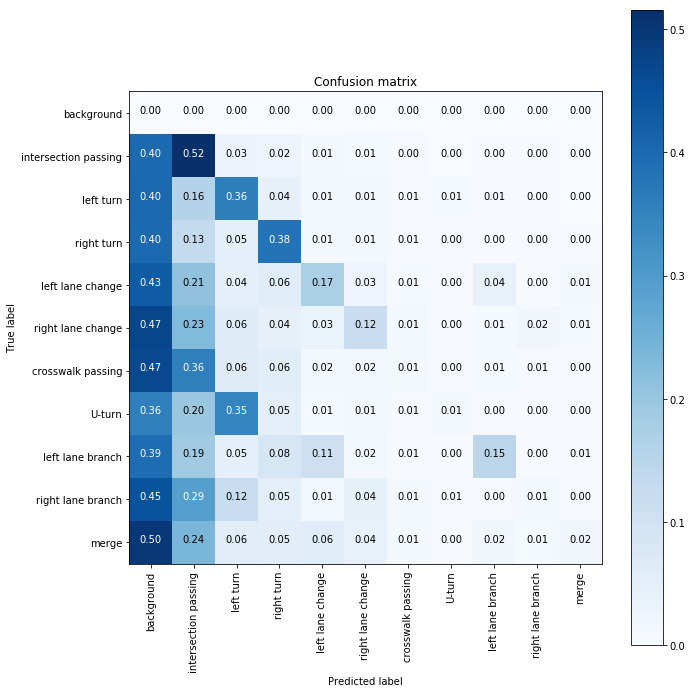

In [11]:
# load results
model_path = 'base_model_rtsn_lr1e-2_20180404-143558'

results = pickle.load(open(os.path.join(result_root+model_path, "results.pkl"), 'rb'))

class_name = []
for l in results['confusion']['labels']:
    class_name.append(' '.join(honda_num2labels[l].split(' ')[1:]))
class_name[0] = "background"
class_name[1] = "intersection passing"
   
plt.figure(figsize=(10, 10))
plot_confusion_matrix(results['confusion']['confusion_matrix'], class_name, normalize=True)
plt.show()